In [11]:
# 프로야구 연봉 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn import linear_model
picher_file_path = 'picher_stats_2017.csv'
batter_file_path = 'batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)
batter.columns

SyntaxError: invalid syntax (<ipython-input-11-5ebac1d4bb5a>, line 5)

In [ ]:
오혜영 이지민
강인구 강재연
강준영 공나경
김영지 강민규
손희서 김수정
조영훈 이우경
이유현 장민수
차재경 한상현
류영석//
박수정
현종규 박예은 서정원 이승렬
ㅇㄱ 장민수 조영훈 최홍석 이현준 남성현

In [12]:
pi_fea_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9',
                    '볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2018)','연봉(2017)']]
pi_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   승         152 non-null    int64  
 1   패         152 non-null    int64  
 2   세         152 non-null    int64  
 3   홀드        152 non-null    int64  
 4   블론        152 non-null    int64  
 5   경기        152 non-null    int64  
 6   선발        152 non-null    int64  
 7   이닝        152 non-null    float64
 8   삼진/9      152 non-null    float64
 9   볼넷/9      152 non-null    float64
 10  홈런/9      152 non-null    float64
 11  BABIP     152 non-null    float64
 12  LOB%      152 non-null    float64
 13  ERA       152 non-null    float64
 14  RA9-WAR   152 non-null    float64
 15  FIP       152 non-null    float64
 16  kFIP      152 non-null    float64
 17  WAR       152 non-null    float64
 18  연봉(2018)  152 non-null    int64  
 19  연봉(2017)  152 non-null    int64  
dtypes: float64(11), int64(9)
memory 

In [14]:
picher = picher.rename(columns = {'연봉(2018)':'y'})

SyntaxError: invalid syntax (<ipython-input-7-dd1086524629>, line 1)

In [15]:
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [16]:
picher = pd.concat([picher, team_encoding], axis=1)
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,85000,0,0,0,0,1,0,0,0,0
1,소사,LG,11,11,1,0,0,30,29,185.1,...,50000,0,0,1,0,0,0,0,0,0
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,150000,1,0,0,0,0,0,0,0,0
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,100000,0,0,1,0,0,0,0,0,0
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,85000,0,0,0,0,0,0,1,0,0


In [17]:
picher = picher.drop('팀명', axis=1)

In [18]:
x = picher[picher.columns.difference({'선수명','y'})]
y = picher['y']

In [20]:
from sklearn import preprocessing as pp
x = pp.StandardScaler().fit(x).transform(x)


In [26]:
pd.options.mode.chained_assignment = None # 과학적표기방법 안씀
# 정규화 함수
def standard_scaling(df, scale_columns) :
    for col in scale_columns :
        s_mean = df[col].mean()
        s_std = df[col].std()
        df[col] =  df[col].apply(lambda x : (x - s_mean)/s_std)
    return df

In [29]:
pi_fea_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9',
                    '볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2017)']]
pi_fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   승         152 non-null    float64
 1   패         152 non-null    float64
 2   세         152 non-null    float64
 3   홀드        152 non-null    float64
 4   블론        152 non-null    float64
 5   경기        152 non-null    float64
 6   선발        152 non-null    float64
 7   이닝        152 non-null    float64
 8   삼진/9      152 non-null    float64
 9   볼넷/9      152 non-null    float64
 10  홈런/9      152 non-null    float64
 11  BABIP     152 non-null    float64
 12  LOB%      152 non-null    float64
 13  ERA       152 non-null    float64
 14  RA9-WAR   152 non-null    float64
 15  FIP       152 non-null    float64
 16  kFIP      152 non-null    float64
 17  WAR       152 non-null    float64
 18  연봉(2017)  152 non-null    int64  
dtypes: float64(18), int64(1)
memory usage: 22.7 KB


In [30]:
picher_df = standard_scaling(picher,pi_fea_df )

In [35]:
# 정규화된 x
x = picher[picher_df.columns.difference({'선수명','y'})]
x.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
0,0.016783,-0.587056,-0.971030,0,0,0,0.446615,0,3.174630,1,...,0.672099,2.452068,-0.306452,3.313623,2.734705,2.645175,1.227145,0,-0.585705,-0.442382
1,-0.241686,-0.519855,-1.061888,0,0,1,-0.122764,0,3.114968,0,...,0.134531,2.349505,-0.098502,2.019505,1.337303,2.547755,2.504721,0,-0.585705,-0.668521
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
3,-0.477680,-0.627856,-0.698455,0,0,1,0.558765,0,2.740722,0,...,0.350266,2.246942,-0.306452,1.760682,3.333592,2.350927,1.227145,0,-0.585705,-0.186746
4,-0.196735,-0.539055,-0.612941,0,0,0,0.481122,0,2.751570,0,...,0.155751,2.452068,-0.306452,2.537153,2.734705,2.587518,1.227145,0,-0.585705,-0.294900


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [33]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   승         152 non-null    float64
 2   패         152 non-null    float64
 3   세         152 non-null    float64
 4   홀드        152 non-null    float64
 5   블론        152 non-null    float64
 6   경기        152 non-null    float64
 7   선발        152 non-null    float64
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  y         152 non-null    int64  
 20  연봉(2017)  152 non-null    float6

In [3]:
# ols
import statsmodels.api as sm

In [23]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           7.70e-42
Time:                        10:11:19   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.872e+04    775.412     24.136      0.000    1.72e+04    2.03e+04
x1         -1476.1375   1289.136     -1.145      0.255   -4036.106    1083.831
x2          -415.3144   2314.750     -0.179      0.858   -5011.949    4181.320
x3         -9.383e+04    9.4e+04     -0.998      0.321    -2.8e+05    9.28e+04
x4          -485.0276    671.883     -0.722      0.472   -1819.254     849.199
x5           498.2459    695.803      0.716      0.476    -883.480    1879.972
x6          -262.5237    769.196     -0.341      0.734   -1789.995    1264.948
x7         -1371.0060   1559.650     -0.879      0.382   -4468.162    1726.150
x8          -164.7210    760.933     -0.216      0.829   -1675.784    1346.342
x9          3946.0617   2921.829      1.351      0.180   -1856.111    9748.235
x10          269.1233    721.020      0.373      0.710   -1162.679    1700.926
x11         1.024e+04   2523.966      4.057      0.000    5226.545    1.53e+04
x12         7.742e+04   7.93e+04      0.977      0.331      -8e+04    2.35e+05
x13        -2426.3684   2943.799     -0.824      0.412   -8272.169    3419.432
x14         -285.5830    781.560     -0.365      0.716   -1837.606    1266.440
x15          111.1761    758.548      0.147      0.884   -1395.150    1617.502
x16         7587.0753   6254.661      1.213      0.228   -4833.443       2e+04
x17         1266.8570   1238.036      1.023      0.309   -1191.636    3725.350
x18         -972.1837    817.114     -1.190      0.237   -2594.810     650.443
x19         5379.1903   7262.214      0.741      0.461   -9042.128    1.98e+04
x20        -4781.4961   5471.265     -0.874      0.384   -1.56e+04    6083.352
x21         -249.8717   1291.108     -0.194      0.847   -2813.757    2314.014
x22          235.2476   2207.965      0.107      0.915   -4149.333    4619.828
x23         1.907e+04   1266.567     15.055      0.000    1.66e+04    2.16e+04
x24          851.2121   6602.114      0.129      0.898   -1.23e+04     1.4e+04
x25         1297.3310   1929.556      0.672      0.503   -2534.385    5129.047
x26         1199.4709    720.099      1.666      0.099    -230.503    2629.444
x27         -931.9918   1632.526     -0.571      0.569   -4173.865    2309.882
x28         1.808e+04   1.67e+04      1.082      0.282   -1.51e+04    5.13e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [ ]:
# r_squared 결정계수
독립변수의 변동량으로 설명되는 종속변수의 변동량
상관계수의 제곱과 가다
# adj 수정결정계수
독립변수가 많아지는 경우 결정계수값이 커질수있어, 표본의 크기와 독립변수의 수를 고려하여
다중회귀분석을 수행하는 경우
p>|t| 각피처의 검정통계량(f statistics )이 유의미한지를 나타내는 pvalue 값
p value < 0.05 이면 피처가 회귀분석에 유의미한 피처다
이분석에서는 war 연복2017 한화 3개가 0.05미만
=> 회귀분석에서 유의미한 피처들

In [34]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           7.70e-42
Time:                        10:53:15   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.63e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


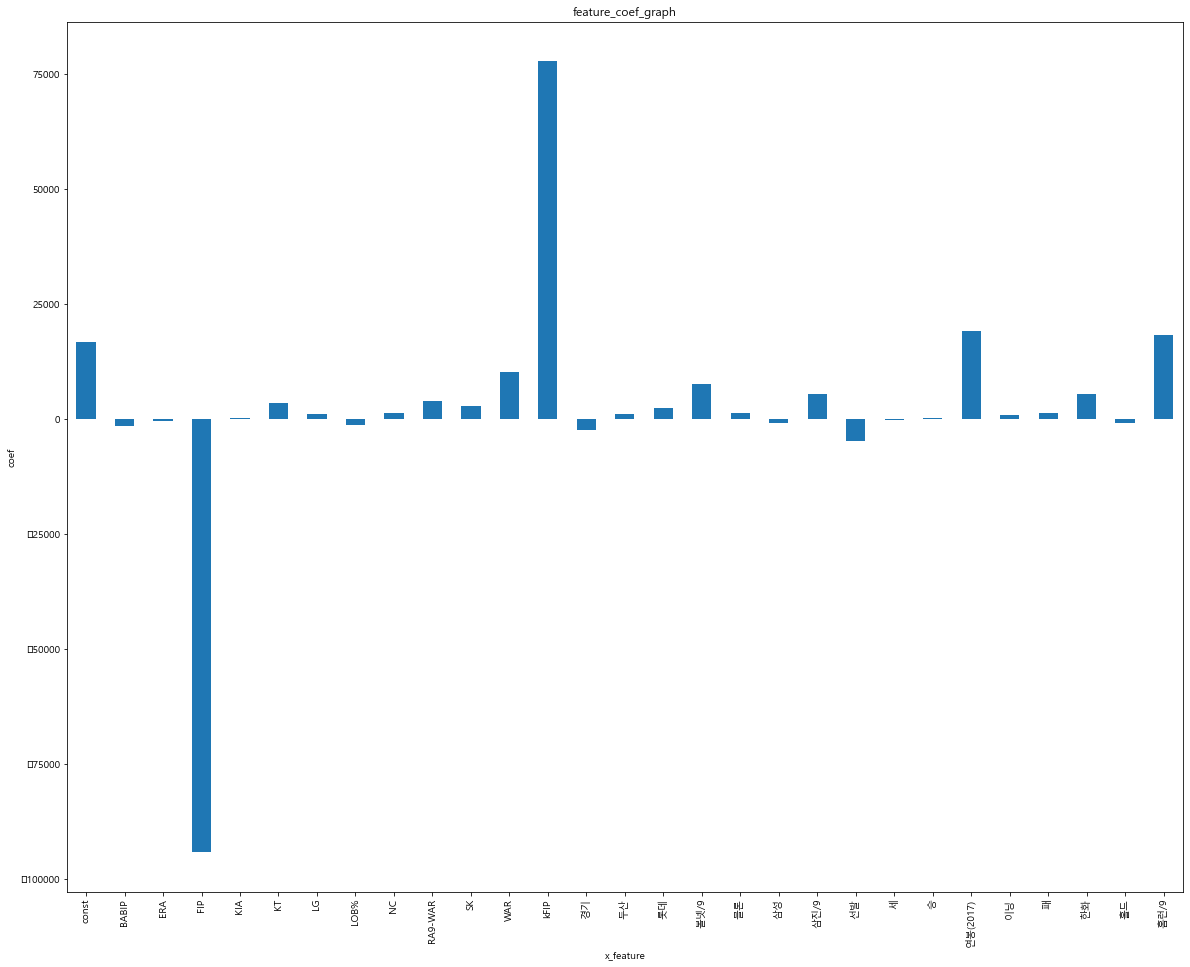

In [36]:
plt.rcParams['figure.figsize'] = [20, 16]
plt.rc('font', family = 'Malgun Gothic')
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)
x_labels = model.params.index.tolist()
ax = coefs_series.plot(kind = 'bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_feature')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)


In [ ]:
다중공선성이 높으면 상관성이 너무 높은 것
안정적인 분석을 위해서 안써야함


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


In [ ]:
변수간 상관관계가 높아서 분석에 부정적인 영향을 미침
vif 평가 : 분산팽창요인 
    보통 10~15 정도를 넘으면 다중공선성에 문제가 있다고 판단
    홈런, 이닝, 선발, 삼진, 볼넷, 경기, kfip,fip 
    특히 이둘은 너무 유사해서 상승효과가 생김, 그래서 하나는 빼버려야함
1. vif 계수 높은 피처 제거, 유사피처중 한개만 제거
2. 다시모델을 실행해서 공선성 검증
3. 분석결과에서 p-value값이 유의미한 피처들을 선정

In [41]:
# 적절한 피처를 선정해서 다시 학습하기
# 피처간 상관계수를 그래프로 작성
scale_columns = ['승','패','세','홀드','블론','경기','선발','이닝','삼진/9',
                    '볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2017)']
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   승         152 non-null    float64
 2   패         152 non-null    float64
 3   세         152 non-null    float64
 4   홀드        152 non-null    float64
 5   블론        152 non-null    float64
 6   경기        152 non-null    float64
 7   선발        152 non-null    float64
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  y         152 non-null    int64  
 20  연봉(2017)  152 non-null    float6

In [43]:
corr = picher_df[scale_columns].corr(method='pearson')
corr

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
승,1.000000,0.710749,0.053747,0.092872,0.105281,0.397074,0.773560,0.906093,0.078377,-0.404710,-0.116147,-0.171111,0.131178,-0.271086,0.851350,-0.303133,-0.314159,0.821420,0.629710
패,0.710749,1.000000,0.066256,0.098617,0.121283,0.343147,0.771395,0.829018,0.031755,-0.386313,-0.064467,-0.133354,-0.020994,-0.188036,0.595989,-0.233416,-0.238688,0.625641,0.429227
세,0.053747,0.066256,1.000000,0.112716,0.605229,0.434290,-0.177069,0.020278,0.170436,-0.131394,-0.073111,-0.089212,0.167557,-0.150348,0.167669,-0.199746,-0.225259,0.084151,0.262664
홀드,0.092872,0.098617,0.112716,1.000000,0.490076,0.715527,-0.285204,0.024631,0.186790,-0.146806,-0.076475,-0.104307,0.048123,-0.155712,0.003526,-0.211515,-0.237353,-0.038613,-0.001213
블론,0.105281,0.121283,0.605229,0.490076,1.000000,0.630526,-0.264160,0.014176,0.188423,-0.137019,-0.064804,-0.112480,0.100633,-0.160761,0.008766,-0.209014,-0.237815,-0.058213,0.146584
경기,0.397074,0.343147,0.434290,0.715527,0.630526,1.000000,-0.037443,0.376378,0.192487,-0.364293,-0.113545,-0.241608,0.105762,-0.320177,0.281595,-0.345351,-0.373777,0.197836,0.225357
선발,0.773560,0.771395,-0.177069,-0.285204,-0.264160,-0.037443,1.000000,0.894018,-0.055364,-0.312935,-0.058120,-0.098909,0.041819,-0.157775,0.742258,-0.151040,-0.142685,0.758846,0.488559
이닝,0.906093,0.829018,0.020278,0.024631,0.014176,0.376378,0.894018,1.000000,0.037343,-0.451101,-0.107063,-0.191514,0.103369,-0.285392,0.853354,-0.296768,-0.302288,0.832609,0.586874
삼진/9,0.078377,0.031755,0.170436,0.186790,0.188423,0.192487,-0.055364,0.037343,1.000000,0.109345,0.216017,0.457523,-0.071284,0.256840,0.102963,-0.154857,-0.317594,0.151791,0.104948
볼넷/9,-0.404710,-0.386313,-0.131394,-0.146806,-0.137019,-0.364293,-0.312935,-0.451101,0.109345,1.000000,0.302251,0.276009,-0.150837,0.521039,-0.398586,0.629833,0.605008,-0.394131,-0.332379


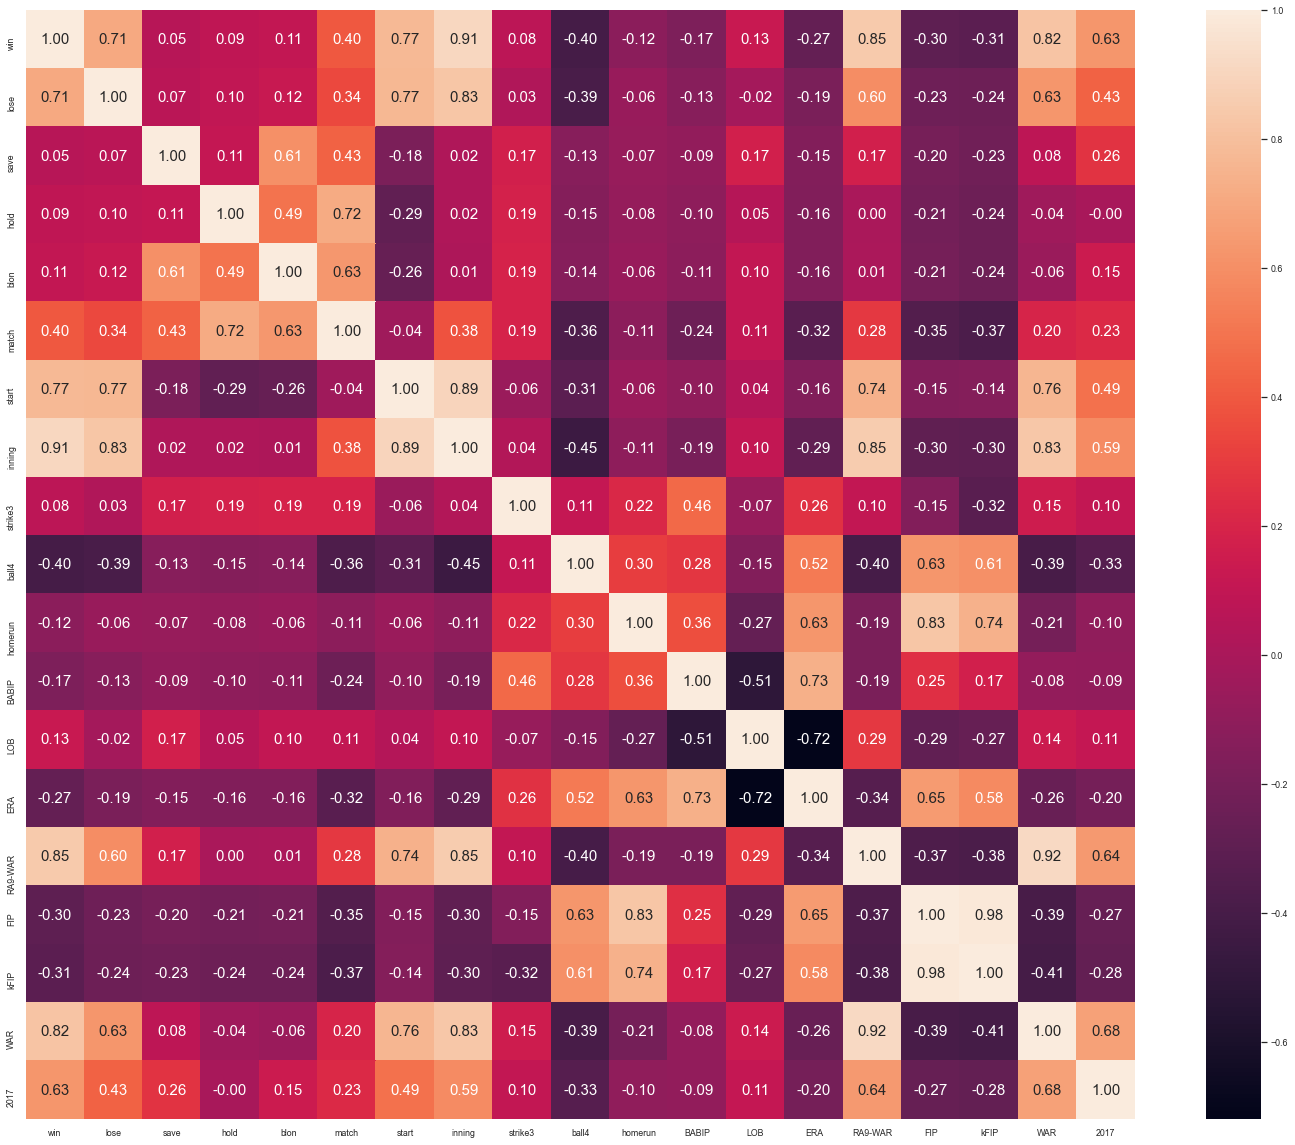

In [44]:
# 히트맵 시각화
import seaborn as sns
show_cols = ['win', 'lose','save','hold','blon','match','start','inning','strike3',
            'ball4','homerun','BABIP','LOB','ERA','RA9-WAR','FIP','kFIP','WAR','2017']
plt.rc('font', family = 'Nanum Gothic')
sns.set(font_scale=0.8)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws={'size':15},
                yticklabels = show_cols,
                xticklabels = show_cols)
plt.tight_layout()
plt.show()

In [45]:
x = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
y = picher_df['y'] 

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [49]:
# 모델학습하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [50]:
# r2
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9150591192570362
0.9038759653889865


In [53]:
# rmse 평가
# mse 평균제곱오차
from math import sqrt
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_pred)))
y_pred = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_pred)))

7893.462873347693
13141.86606359108


In [54]:
# 피처별 vif 공분산
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.round(1)
# 

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [61]:
# 시각화\ 비교
# 모든 데이터 검증
# lr 학습이 완료된 객체
x = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
predict_2018_salary = lr.predict(x)
predict_2018_salary[:5]
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [62]:
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명','연봉(2017)']]

In [63]:
# 2018년 연봉 내림차순
result_df = picher_df.sort_values(by=['y'], ascending = False)
# 연봉2017 삭제, 정규화된 데이터, 실제데이터가 아님
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
# 연봉 2017의 실제데이터로 컬럼 변경
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y','예측연봉(2018)','연봉(2017)']]
result_df.columns = ['선수명','실제연봉(2018)','예측연봉(2018)','작년연봉(2017)']

In [64]:
result_df

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,163930.148696,150000
1,켈리,140000,120122.822204,85000
2,소사,120000,88127.019455,50000
3,정우람,120000,108489.464585,120000
4,레일리,111000,102253.697589,85000
...,...,...,...,...
147,장지훈,2800,249.850641,2700
148,차재용,2800,900.811527,2800
149,성영훈,2700,5003.619609,2700
150,정동윤,2700,2686.350884,2700


<AxesSubplot:xlabel='선수명'>

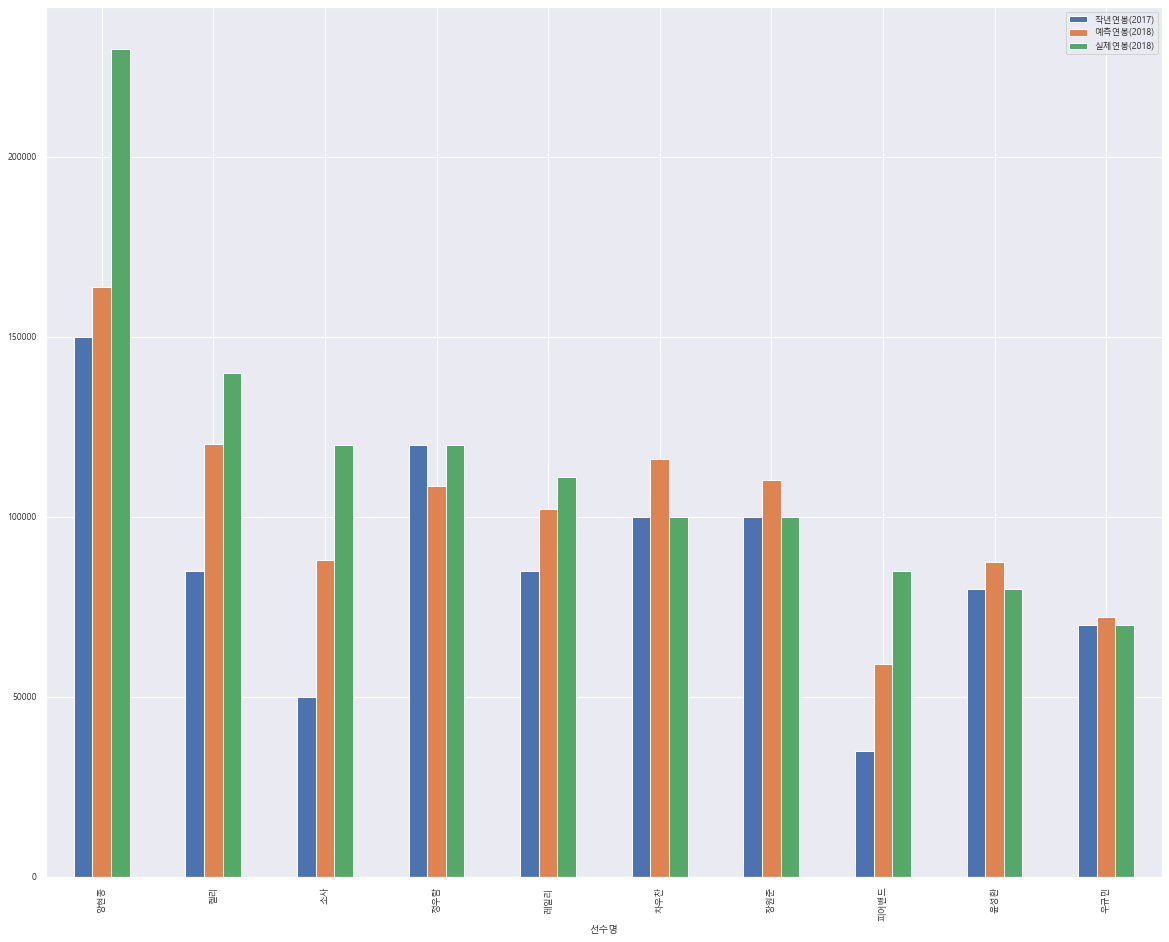

In [69]:
result_df = result_df.iloc[:10,:]
plt.rc('font', family = 'Malgun Gothic')
result_df.plot(x='선수명', y=['작년연봉(2017)','예측연봉(2018)','실제연봉(2018)'], kind='bar')

In [70]:
# 2017연봉과 2018년 연봉이 다른 선수들만 
result_df = result_df[result_df['작년연봉(2017)'] != result_df['예측연봉(2018)']]
result_df.head()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,163930.148696,150000
1,켈리,140000,120122.822204,85000
2,소사,120000,88127.019455,50000
3,정우람,120000,108489.464585,120000
4,레일리,111000,102253.697589,85000


In [71]:
result_df = result_df.reset_index()
result_df.head()

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,3,정우람,120000,108489.464585,120000
4,4,레일리,111000,102253.697589,85000


<AxesSubplot:xlabel='선수명'>

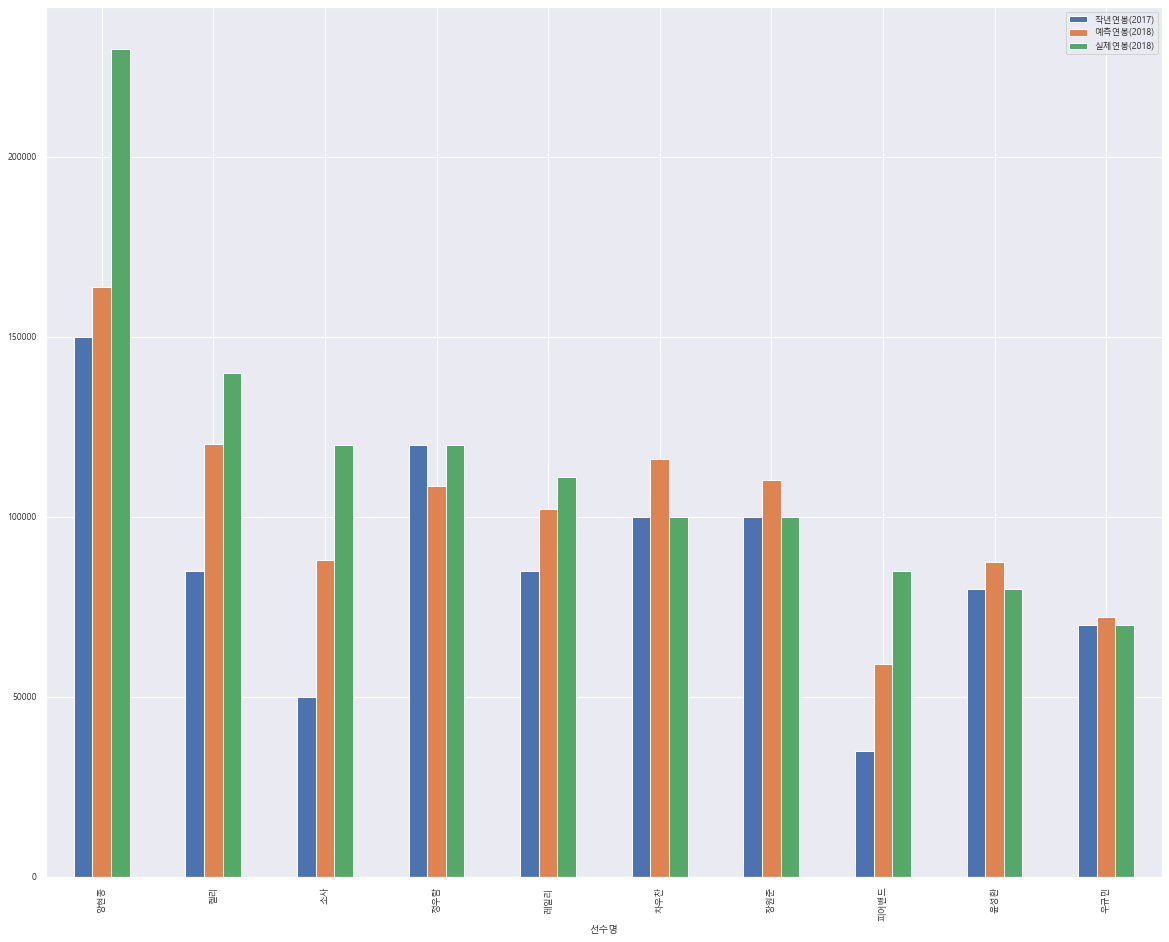

In [73]:
result_df = result_df.iloc[:10, :]
result_df.plot(x='선수명', y=['작년연봉(2017)','예측연봉(2018)','실제연봉(2018)'],kind = 'bar')